In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
#Loading data
iris = datasets.load_iris()
x = iris.data[:, :2]
y = iris.target
#Model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg.fit(x, y)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [5]:
x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

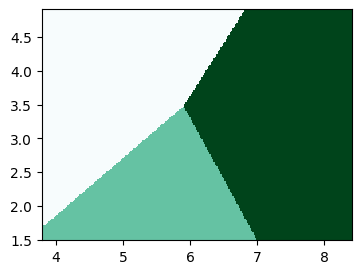

In [29]:
Z = Z.reshape(xx.shape)
plt.figure(1, figsize = (4,3))
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.BuGn)

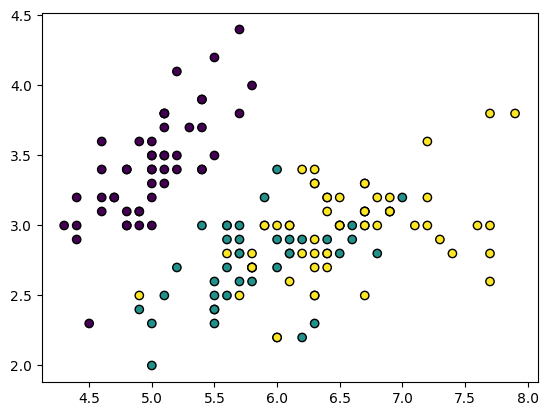

In [33]:
plt.scatter(x[:,0], x[:, 1],c = y, edgecolors = 'k', cmap = plt.cm.viridis)

In [36]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr

In [39]:
x = npr.rand(1000, 64, 64, 3)
y = npr.randint(0, 100, 1000)
y = y/100.0
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [43]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (64,64,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation = 'relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(1, activation = 'linear')
])

model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mae']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
history = model.fit(
    x_train,y_train,
    validation_data = (x_test, y_test),
    epochs = 10,
    batch_size = 32
)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 190ms/step - loss: 0.4286 - mae: 0.4833 - val_loss: 0.0995 - val_mae: 0.2736
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 228ms/step - loss: 0.0854 - mae: 0.2522 - val_loss: 0.0863 - val_mae: 0.2580
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 193ms/step - loss: 0.0830 - mae: 0.2464 - val_loss: 0.0825 - val_mae: 0.2511
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - loss: 0.0882 - mae: 0.2536 - val_loss: 0.0836 - val_mae: 0.2484
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 180ms/step - loss: 0.0842 - mae: 0.2515 - val_loss: 0.0816 - val_mae: 0.2480
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 228ms/step - loss: 0.0873 - mae: 0.2590 - val_loss: 0.0836 - val_mae: 0.2531
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 206ms/step - loss: 0.0873 - mae: 0.2557 - val_loss: 0.0822 - val_mae: 0.2478
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 179ms/step - loss: 0.0822 - mae: 0.2441 - val_loss: 0.0817 - val_mae: 0.2488
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 227ms/step - 

In [46]:
model.save('age_model.h5')
print('Model saved as age_model.h5')

Model saved as age_model.h5


In [47]:
loss, mae = model.evaluate(x_test, y_test)
print(f"Test MAE: {mae * 100:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0808 - mae: 0.2437
Test MAE: 24.91


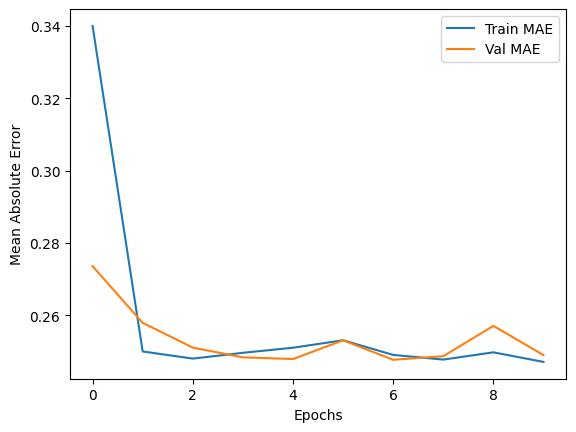

In [48]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.legend()
plt.show()